## Initialization

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import graphviz




In [2]:
## loading wine dataset and implement preprocessing
import utils
X_train, X_test,y_train,y_test = utils.wine_preprocess()

Using TensorFlow backend.


## Decision Tree Classifier

In [8]:
## Using Validation Set to tune hyperparameters

decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")

parameter_grid = {'max_depth': [3, 4, 5],
                  'max_features': [2, 3, 4, 5,6],
                   'class_weight':[{ 0:0.2, 1:0.8 },{ 0:0.3, 1:0.7 },{ 0:0.4, 1:0.6 }]}

grid_search = GridSearchCV(decision_tree_classifier, 
                           param_grid = parameter_grid,
                           cv=3,
                           scoring='recall')

grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8413095375413463
Best params: {'class_weight': {0: 0.2, 1: 0.8}, 'max_depth': 5, 'max_features': 6}


In [17]:
## Using test set to evaluate model performance 
from sklearn.metrics import recall_score
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=5,
                                  max_features=6,
                                  class_weight={ 0:0.2, 1:0.8 },
                                  random_state=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = recall_score(y_test,y_pred)
print(test_score)

0.8157894736842105


Using recall score as scoring metrics


<module 'matplotlib.pyplot' from '/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/pyplot.py'>

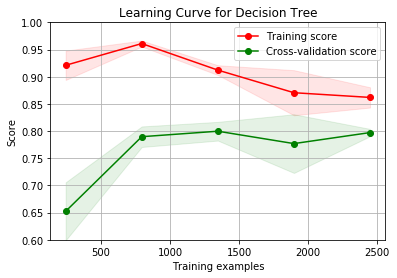

In [18]:
## Plotting Learning Curve 
title = 'Learning Curve for Decision Tree'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.6,1),cv=3,n_jobs=4)

In [19]:
## Visualize Decision Tree 
import pandas as pd
df = pd.read_csv('winequality-white.csv',sep=";")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=df.columns[:-1],
                      class_names=['bad','good'],
                      filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.format = 'png'
graph.render('./WriteUp/images/wine_tree')  

'./WriteUp/images/wine_tree.png'

## Neural Network


In [26]:
## Using Validation Set to tune hyperparameters

import time
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras_metrics import recall


def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[recall()])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
start=time.time()

model = KerasClassifier(build_fn=create_model)
optimizers = ['rmsprop', 'adam','SGD']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([10,50, 100, 150])
param_grid = dict(optimizer=optimizers, batch_size=batches, init=init,nb_epoch=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid,verbose=0,cv=3,scoring='recall')
grid_result = grid.fit(X_train, y_train)



Epoch 1/1
2448/2448 [==============================] - 0s 117us/step - loss: 0.5688 - recall: 0.0000e+00
Epoch 1/1
2449/2449 [==============================] - 0s 124us/step - loss: 0.5714 - recall: 0.0095
Epoch 1/1
2449/2449 [==============================] - 0s 126us/step - loss: 0.5732 - recall: 0.0000e+00
Epoch 1/1
2448/2448 [==============================] - 0s 145us/step - loss: 0.5781 - recall: 0.0019
Epoch 1/1
2449/2449 [==============================] - 0s 142us/step - loss: 0.5745 - recall: 0.0095
Epoch 1/1
2449/2449 [==============================] - 0s 161us/step - loss: 0.5442 - recall: 0.0000e+00
Epoch 1/1
2448/2448 [==============================] - 0s 132us/step - loss: 0.6261 - recall: 0.0037
Epoch 1/1
2449/2449 [==============================] - 0s 136us/step - loss: 0.6240 - recall: 0.0019
Epoch 1/1
2449/2449 [==============================] - 0s 135us/step - loss: 0.6245 - recall: 0.0057
Epoch 1/1
2448/2448 [==============================] - 0s 148us/step - loss: 0.

2449/2449 [==============================] - 2s 981us/step - loss: 0.6751 - recall: 0.0152
Epoch 1/1
2449/2449 [==============================] - 2s 906us/step - loss: 0.6752 - recall: 0.0189
Epoch 1/1
2448/2448 [==============================] - 2s 901us/step - loss: 0.6847 - recall: 0.0412
Epoch 1/1
2449/2449 [==============================] - 2s 918us/step - loss: 0.6823 - recall: 0.0057
Epoch 1/1
2449/2449 [==============================] - 2s 934us/step - loss: 0.6839 - recall: 0.0057
Epoch 1/1
2448/2448 [==============================] - 2s 958us/step - loss: 0.6890 - recall: 0.0112
Epoch 1/1
2449/2449 [==============================] - 2s 933us/step - loss: 0.6878 - recall: 0.0019
Epoch 1/1
2449/2449 [==============================] - 2s 927us/step - loss: 0.6890 - recall: 0.0379
Epoch 1/1
2448/2448 [==============================] - 2s 917us/step - loss: 0.6842 - recall: 0.0225
Epoch 1/1
2449/2449 [==============================] - 2s 932us/step - loss: 0.6840 - recall: 0.0399


3673/3673 [==============================] - 8s 2ms/step - loss: 0.5192 - recall: 0.0000e+00


In [1]:
print("Best Score: {}".format(grid_result.best_score_))
print("Best params: {}".format(grid_result.best_params_))

NameError: name 'grid_result' is not defined

In [37]:
%matplotlib inline

## Create Final Model 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras_metrics import recall

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(11, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[recall()])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2,batch_size=20, epochs=150,verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'loss', 'recall', 'val_recall'])


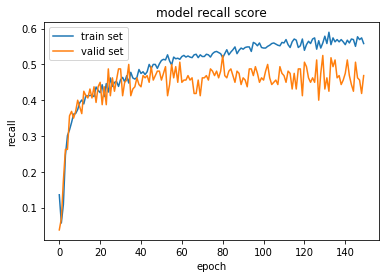

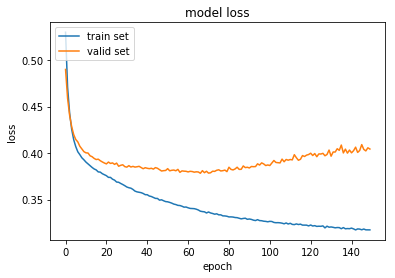

"\nplt.plot(history.history['acc'])\nplt.plot(history.history['val_acc'])\nplt.title('model recall score')\nplt.ylabel('recall')\nplt.xlabel('epoch')\nplt.legend(['train set', 'valid set'], loc='upper left')\nplt.show()\n# summarize history for loss\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train set', 'valid set'], loc='upper left')\nplt.show()\n"

In [38]:
## Plotting Learning Curve 

# summarize history for accuracy
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall score')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train set', 'valid set'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'valid set'], loc='upper left')
plt.show()


In [40]:
## Using test set to evaluate model performance 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# make a prediction
y_pred = (model.predict(X_test) >.5).astype(int)
print('testing score = {}'.format(recall_score(y_test,y_pred)))
#print('testing score = {}'.format(accuracy_score(y_test,y_pred)))

testing score = 0.5


## Support Vector Machine

In [61]:
# svm with grid search selecting the best regularization parameter,
# value of gamma,  class weight, and kernels 

from sklearn.svm import SVC
svm = SVC()
parameter_grid = {'kernel':('linear', 'rbf','poly','sigmoid'), 
                  'C':(1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000),
                  'gamma': (1,2,3),
                  'class_weight':[{0:0.2, 1:0.8},{0:0.3, 1:0.7},{ 0:0.4, 1:0.6}]}

grid_search = GridSearchCV(svm, param_grid = parameter_grid,cv=3)
grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

array([0, 1])

In [ ]:
## Evaluate model quality using test set
clf = SVC(C=10,gamma='scale',kernel='poly')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

In [ ]:
## Plotting Learning Curve 
title = 'Learning Curve for SVM'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.2,1.3),cv=3,n_jobs=4,scoring='accuracy')

## Boosting

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading the Decision Tree Classifier we used earlier
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy",
                                                  max_features=4,
                                                  max_depth=5,
                                                  class_weight={0: 0.4, 1: 0.6})

## Using 3-fold cross-validation to tune hyperparameters for boosting
boosting_clf = AdaBoostClassifier(decision_tree_classifier)

parameter_grid = {'n_estimators': [50, 100, 200,300],
                  'learning_rate': [0.5,1,2]}

grid_search = GridSearchCV(boosting_clf, param_grid = parameter_grid,cv=3)

grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

KeyboardInterrupt: 

In [8]:
## Using test set to evaluate model performance 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
boosting_clf = AdaBoostClassifier(decision_tree_classifier,
                                  learning_rate=0.5,
                                  n_estimators=300)

boosting_clf.fit(X_train, y_train)
y_pred = boosting_clf.predict(X_test)
test_score = recall_score(y_test,y_pred)
print(test_score)
#test_accuracy = boosting_clf.score(X_test, y_test)
#print(test_accuracy)

0.5917602996254682


Text(0.5,1,'Test Error With Number of Trees')

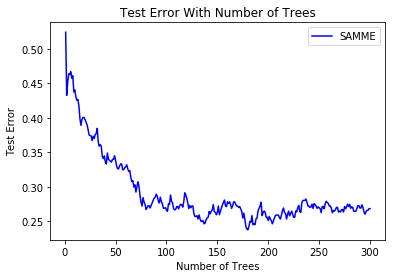

In [12]:
import matplotlib.pyplot as plt

real_test_errors = []

for real_test_predict in boosting_clf.staged_predict(X_test):
    real_test_errors.append(1. - recall_score(real_test_predict, y_test))

n_trees_discrete = len(boosting_clf)

plt.figure()
plt.plot(range(1, n_trees_discrete + 1),
         real_test_errors, c='blue', label='SAMME')
plt.legend()
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.title('Test Error With Number of Trees')

## kNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors':range(3,21,2),'weights':['uniform','distance']}

grid_search = GridSearchCV(knn, param_grid = parameter_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))


In [ ]:
## Use the best hyperparameters to train the model using the entire training set 
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=3,weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

In [ ]:
## Plotting Learning Curve 
title = 'Learning Curve for k-nearest neighbor"(k=3)'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.2,1.3),cv=3,n_jobs=4,scoring='accuracy')